In [2]:
import numpy as np
from numpy import random    
import matplotlib.pyplot as plt

In [3]:
"""
function run_recurrence
Runs the recurrence relation defined by x(n+1) = f(x(n))
inputs:
    f : the function defining the right hand side of the recurrence relation.
        f must have the function signature f(n,x,a,b,c,...) where the iterator
        n,x(n) appears first and all other parameters appear after.
    x0: the initial state of the recurrence relation. Can be any array-like
        object or number.
    N_steps: the number of steps you want to run your recurrence.
output:
    X : a large array containing all computed steps. X[k] is the kth step of the recurrence.
"""
def run_recurrence(f,x0,N_steps,*args):
    x0 = np.array(x0) # turning the initial condition into a numpy array to access the shape command
    X = np.empty((N_steps+1,*x0.shape)) # initializing X to have the correct size to store all iterations
    X[0] = x0 # loading the intial condition into the first element of X
    for i in range(1,N_steps+1):
        X[i]=f(i,X[i-1],*args) # looping through the recurrence relation
    return X

Text(0, 0.5, 'Frequency of Occurence')

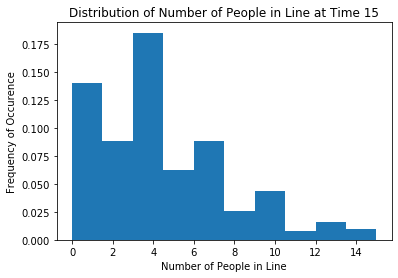

In [6]:
"""
inputs: 
    n,x (for run_recurrence)
    cashier_speed: the poisson rate at which the cashier can clear customers from line
    arrival_rate: the poisson rate at which the customers arrive to the line
"""

def shopping_line(n,x,cashier_speed,arrival_rate):
    return x + random.poisson(arrival_rate) - min(random.poisson(cashier_speed),x)


x0 = 0
N_steps = 15
cashier_speed = 1
arrival_rate = 1
N_sims = 500
X_sims = np.empty(shape = (N_sims,N_steps+1))
xN_steps = list()
for i in range(N_sims):
    X = run_recurrence(shopping_line,x0,N_steps,cashier_speed,arrival_rate)
    X_sims[i,:] = X
    xN_steps.append(X[-1])


plt.hist(xN_steps,density=True)
plt.title(f"Distribution of Number of People in Line at Time {N_steps}")
plt.xlabel(f"Number of People in Line")
plt.ylabel(f"Frequency of Occurence")

Text(0.5, 0, 'Time Step')

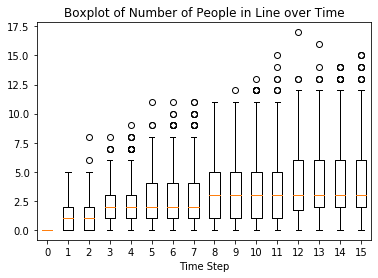

In [7]:
plt.boxplot(X_sims,labels = np.arange(N_steps+1))
plt.title(f"Boxplot of Number of People in Line over Time")
plt.xlabel(f"Time Step")